In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
index = ['age','workclass','fnlwgt','education','education_num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'salary']

In [3]:
data = pd.read_csv('adult.data', header=None, names=index)

In [4]:
X = data.drop('salary',axis=1)
y = data.salary

In [5]:
le = preprocessing.LabelEncoder()
cat = X.select_dtypes(include='object')
num = X.select_dtypes(exclude='object')
y_le = pd.Series(le.fit_transform(y), name='salary')

In [6]:
print(cat.shape, num.shape)

(32561, 8) (32561, 6)


In [7]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
cat_enc = pd.DataFrame(enc.fit_transform(cat), columns=cat.columns)
cat_enc

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0
1,6.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0
2,4.0,11.0,0.0,6.0,1.0,4.0,1.0,39.0
3,4.0,1.0,2.0,6.0,0.0,2.0,1.0,39.0
4,4.0,9.0,2.0,10.0,5.0,2.0,0.0,5.0
...,...,...,...,...,...,...,...,...
32556,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0
32557,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0
32558,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0
32559,4.0,11.0,4.0,1.0,3.0,4.0,1.0,39.0


In [8]:
cat_copy = cat.copy().astype('category')
#cat_copy['education'].cat.codes.value_counts()

In [9]:
test= pd.read_csv('adult.test', skiprows=1,names=index)

In [10]:
y_le.dtype

dtype('int32')

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif

num = X.select_dtypes(exclude='object')
fs = SelectKBest(score_func=f_classif, k=5)
num_select = fs.fit_transform(num, y_le)
cols = fs.get_support(indices=True)
best_features = num.columns[cols]
num = pd.DataFrame(num_select, columns=best_features)

In [12]:
X_fin = pd.concat([cat_enc, num], axis=1)
X_fin.columns.values

array(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'age',
       'education_num', 'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype=object)

In [13]:
print(X_fin.var().sort_values(ascending=False))
col = [i for i in X_fin.columns.values if X_fin.var()[i] > 100]
X_fin = X_fin[col]

capital-gain      5.454254e+07
capital-loss      1.623769e+05
age               1.860614e+02
hours-per-week    1.524590e+02
native-country    6.121156e+01
occupation        1.788323e+01
education         1.497894e+01
education_num     6.618890e+00
relationship      2.581713e+00
marital-status    2.268704e+00
workclass         2.119819e+00
race              7.204710e-01
sex               2.213763e-01
dtype: float64


In [14]:
print(X_fin.shape)

(32561, 4)


In [15]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel

X_train, X_test, y_train, y_test = train_test_split(X_fin, y_le, test_size=0.2)

clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
acc = cross_val_score(clf, X_train,y_train, cv=5, scoring='accuracy')
precision = cross_val_score(clf, X_train,y_train, cv=5, scoring='precision')
recall = cross_val_score(clf, X_train,y_train, cv=5, scoring='recall')
f1 = cross_val_score(clf, X_train,y_train, cv=5, scoring='f1')
print(f"acc : {acc.mean()}\nprecision: {precision.mean()}\nrecall: {recall.mean()}\nf1_score: {f1.mean()}")

acc : 0.8009830585816303
precision: 0.7060755866394134
recall: 0.2864018130399411
f1_score: 0.4073444885217878


In [75]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [19]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
ext = DecisionTreeClassifier()
ext.fit(X_train,y_train)
print(ext.feature_importances_)
feature_importances = pd.Series(ext.feature_importances_, index=X_train.columns)
#feature_importances.nlargest(10).plot(kind='barh')
X_train=X_train[feature_importances.nlargest(10).index]

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
scores

[0.27336739 0.3961667  0.16975694 0.16070897]


array([0.79677605, 0.80268714, 0.80015358, 0.80092148, 0.80437704])

In [20]:
scores

array([0.79677605, 0.80268714, 0.80015358, 0.80092148, 0.80437704])

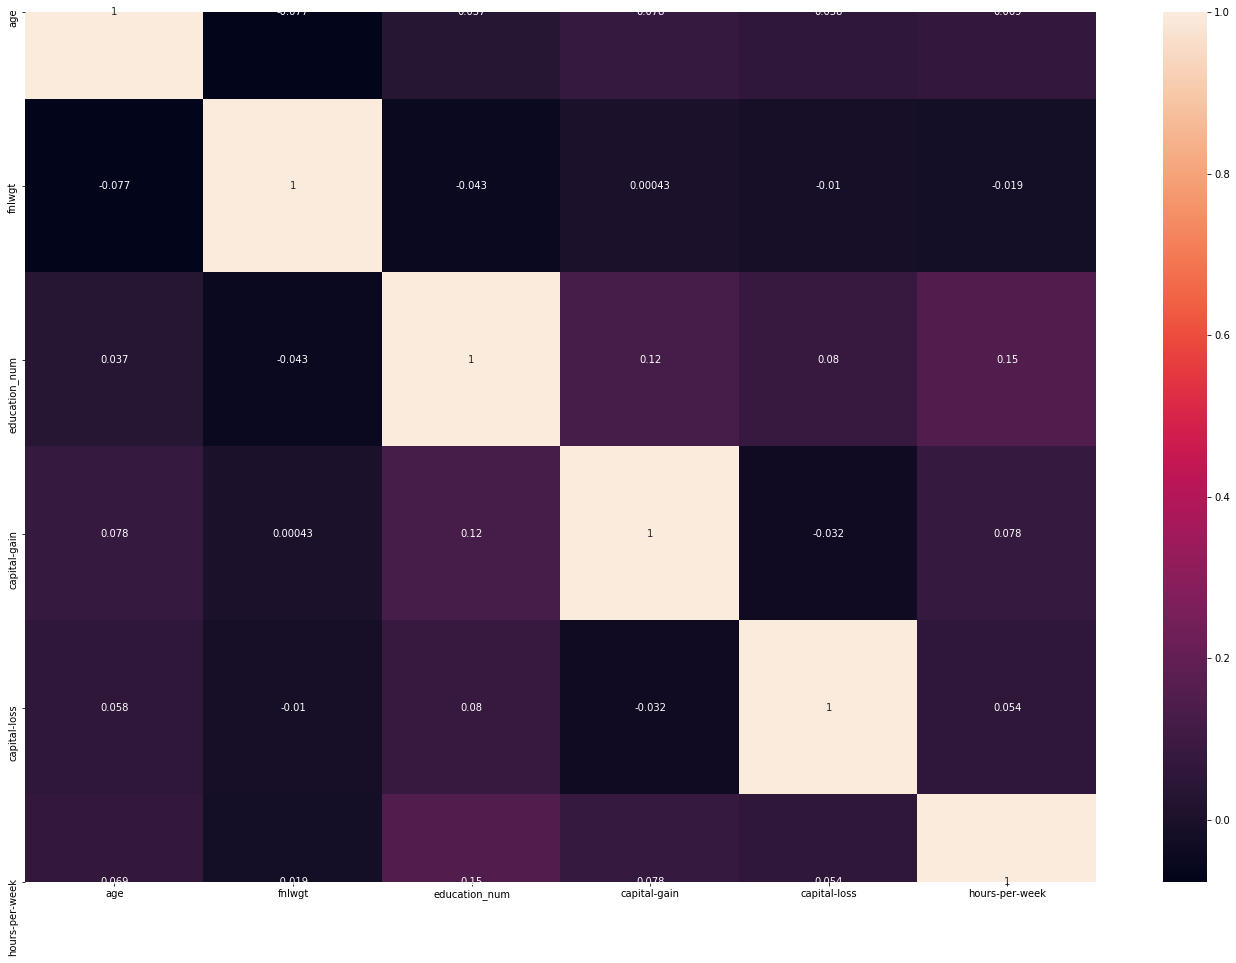

In [22]:
plt.figure(figsize=(24,16))
corr = X.corr()
sns.heatmap(corr, annot=True)